In [1]:
from abc import ABC, abstractmethod
import numpy as np
import torch.nn as nn
import torch

In [18]:
class PointProcess(ABC):    
    pass

In [ ]:
/apps/conda/joao.pires/.envs/jpt/bin/python

In [ ]:
for t in range(1, n_points):
    # X2 is more likely to happen if X1 happened in the previous step
    X2[t] = np.random.binomial(1, 0.5 * X1[t-1])
    # X3 is more likely to happen if X2 happened in the previous step
    X3[t] = np.random.binomial(1, 0.7 * X2[t-1] )

In [76]:
class BinomialTriangular(PointProcess):

    def __init__(self, num_processes, num_points, base_factor, **kwargs):
        
        np.random.seed(42)
        self.num_processes = num_processes        
        self.num_points = num_points    
        self.time = np.arange(num_points)
        self.processes = []
        
        process_base = np.random.binomial(1, base_factor, num_points)        
        matrix = np.zeros(shape = (num_processes, num_points))
        matrix[0, :] = process_base
        
        influence_rank = kwargs.get('influence_rank')
        
        if influence_rank is None:
            range_size = 0.5
            min_val = 0.49
            influence_rank = np.random.rand(self.num_processes - 1)*range_size + min_val
        
        assert len(influence_rank) == (self.num_processes - 1), 'influence rank length must be equal to the number of processes - 1'
        self.influence_rank = influence_rank
        # print(self.influence_rank)
        
        def _generate_data(matrix):
            for t in range(1, self.num_points):
                for j in range(1, self.num_processes):
                    # assert 
                    matrix[j, t] = np.random.binomial(1, self.influence_rank[j-1]*matrix[j-1, t])
            return matrix
        
        self.matrix = _generate_data(matrix)
        
        def _turn_into_time(matrix):
            thold = 0.2
            matrix_times = []
            for j in range(0, self.num_processes):
                matrix_times.append([self.time[i] + thold for i in range(self.num_points) if matrix[j, i] > 0 ])
            return matrix_times
        
        self.matrix_times = _turn_into_time(self.matrix)
            



            

In [82]:
teste = BinomialTriangular(num_processes=10, num_points = 1200, base_factor=0.6)

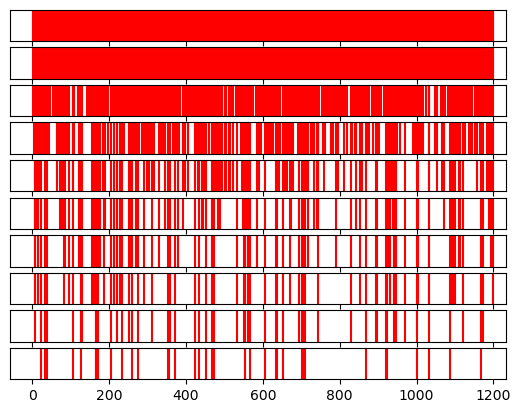

In [83]:
teste = BinomialTriangular(num_processes=10, num_points = 1200, base_factor=0.9)

import matplotlib.pyplot as plt 

def _plot_tick_bars(timestamps_i, ax, color):
    for t in timestamps_i:
        ax.axvline(x=t, color = color)
    # ax.set_title(label, fontsize=20)
    ax.get_yaxis().set_visible(False)
def _plot_tick_bars_causes(timestamps_i, ax, cause):
    colors = ['red', 'green', 'blue']
    for idx, t in enumerate(timestamps_i):
        cause_ = torch.argmax(cause[idx]).item()
        ax.axvline(x=t, color = colors[cause_])
    ax.get_yaxis().set_visible(False)

fig, ax = plt.subplots(nrows = 10, sharex = True)

for i in range(10):
    _plot_tick_bars(teste.matrix_times[i], ax[i], color = 'red')
# _plot_tick_bars(teste.matrix_times[1], ax[1], color = 'green')
# _plot_tick_bars(teste.matrix_times[2], ax[2], color = 'blue')

In [81]:
teste.influence_rank

array([0.8691316 , 0.50229346, 0.50106178, 0.65180511, 0.7343216 ,
       0.87520371, 0.83164769, 0.71295135, 0.62681333])